In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

 Źródło danych: https://www.kaggle.com/datasets/thedevastator/the-unsolved-mysteries-of-scooby-doo?select=scoobydoo.csv

Baza danych zawiera różne informacje dotyczące wszystkich odcinków Scooby-Doo oraz filmów. 
Przykładowe kolumny tyczą się oceny odcinka, zaangażowania, kto złapał potwora, kto został schwytany, kto dał Scooby-chrupka, kto ściągnał maskę potworowi.

## Przygotowanie danych

In [6]:
scooby_doo=pd.read_csv(r"C:\Users\olaki\Documents\studia\semestr 5\Python w analizie danych\scoobydoo.csv", index_col=0)
pd.set_option('display.max_columns', None)
scooby_doo.head()

,index,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,monster_name,monster_gender,monster_type,monster_subtype,monster_species,monster_real,monster_amount,caught_fred,caught_daphnie,caught_velma,caught_shaggy,caught_scooby,captured_fred,captured_daphnie,captured_velma,captured_shaggy,captured_scooby,unmask_fred,unmask_daphnie,unmask_velma,unmask_shaggy,unmask_scooby,snack_fred,snack_daphnie,snack_velma,snack_shaggy,snack_scooby,unmask_other,caught_other,caught_not,trap_work_first,setting_terrain,setting_country_state,suspects_amount,non_suspect,arrested,culprit_name,culprit_gender,culprit_amount,motive,if_it_wasnt_for,and_that,door_gag,number_of_snacks,split_up,another_mystery,set_a_trap,jeepers,jinkies,my_glasses,just_about_wrapped_up,zoinks,groovy,scooby_doo_where_are_you,rooby_rooby_roo,batman,scooby_dum,scrappy_doo,hex_girls,blue_falcon,fred_va,daphnie_va,velma_va,shaggy_va,scooby_va
level_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,556.0,1969-09-13,21,TV Series,Black Knight,Male,Possessed Object,Suit,Object,False,1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,NaN,Urban,United States,2,False,True,Mr. Wickles,Male,1,Theft,NaN,NaN,False,2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
1,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,479.0,1969-09-20,22,TV Series,Ghost of Cptn. Cuttler,Male,Ghost,Suit,Human,False,1,False,False,False,True,False,True,True,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,Coast,United States,2,True,True,Cptn. Cuttler,Male,1,Theft,NaN,NaN,False,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
2,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8.0,455.0,1969-09-27,21,TV Series,Phantom,Male,Ghost,Phantom,Human,False,1,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,Island,United States,0,True,True,Bluestone the Great,Male,1,Treasure,NaN,NaN,False,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
3,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,426.0,1969-10-04,21,TV Series,Miner 49'er,Male,Ancient,Miner,Human,False,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,Cave,California,2,False,True,Hank,Male,1,Natural Resource,NaN,NaN,False,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
4,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,391.0,1969-10-11,21,TV Series,Indian Witch Doctor,Female,Ancient,Witch Doctor,Human,False,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,NaN,Desert,United States,1,False,True,Buck Master,Male,1,Competition,NaN,NaN,False,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,False,False,False,False,False,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick


Usunięcie kolumny index (to samo co level_0).

In [7]:
scooby_doo=scooby_doo.drop("index",axis=1)
scooby_doo.columns

Index(['series_name', 'network', 'season', 'title', 'imdb', 'engagement',
       'date_aired', 'run_time', 'format', 'monster_name', 'monster_gender',
       'monster_type', 'monster_subtype', 'monster_species', 'monster_real',
       'monster_amount', 'caught_fred', 'caught_daphnie', 'caught_velma',
       'caught_shaggy', 'caught_scooby', 'captured_fred', 'captured_daphnie',
       'captured_velma', 'captured_shaggy', 'captured_scooby', 'unmask_fred',
       'unmask_daphnie', 'unmask_velma', 'unmask_shaggy', 'unmask_scooby',
       'snack_fred', 'snack_daphnie', 'snack_velma', 'snack_shaggy',
       'snack_scooby', 'unmask_other', 'caught_other', 'caught_not',
       'trap_work_first', 'setting_terrain', 'setting_country_state',
       'suspects_amount', 'non_suspect', 'arrested', 'culprit_name',
       'culprit_gender', 'culprit_amount', 'motive', 'if_it_wasnt_for',
       'and_that', 'door_gag', 'number_of_snacks', 'split_up',
       'another_mystery', 'set_a_trap', 'jeepers', 'jin

### Brakujące wartości

In [8]:
scooby_doo.isna().sum()

series_name      0
network          0
season           0
title            0
imdb            15
              ... 
fred_va        219
daphnie_va     165
velma_va       218
shaggy_va       32
scooby_va       28
Length: 74, dtype: int64

Zamiana brakujących wartości na wartość "None". W przypadku imdb i engagement na ich średnią.

In [9]:
scoobydoo_noNA=scooby_doo
scoobydoo_noNA['imdb'].fillna(scoobydoo_noNA['imdb'].mean(),inplace=True)
scoobydoo_noNA['engagement'].fillna(scoobydoo_noNA['engagement'].mean(), inplace=True)
scoobydoo_noNA.iloc[:,16:36]=scoobydoo_noNA.iloc[:,16:36].fillna(method='ffill')
scoobydoo_noNA.iloc[:,56:64]=scoobydoo_noNA.iloc[:,56:64].fillna(0.0)
scoobydoo_noNA.fillna('None',inplace=True)
scoobydoo_noNA.isna().sum()

series_name    0
network        0
season         0
title          0
imdb           0
              ..
fred_va        0
daphnie_va     0
velma_va       0
shaggy_va      0
scooby_va      0
Length: 74, dtype: int64

In [10]:
scooby_doo.columns.get_loc("caught_fred")

16

In [11]:
scooby_doo.columns.get_loc("snack_scooby")

35

###  Zamiana typów zmiennych.

In [12]:
pd.set_option('display.max_rows', None)
scooby_doo.dtypes

series_name                  object
network                      object
season                       object
title                        object
imdb                        float64
engagement                  float64
date_aired                   object
run_time                      int64
format                       object
monster_name                 object
monster_gender               object
monster_type                 object
monster_subtype              object
monster_species              object
monster_real                 object
monster_amount                int64
caught_fred                    bool
caught_daphnie                 bool
caught_velma                   bool
caught_shaggy                  bool
caught_scooby                  bool
captured_fred                  bool
captured_daphnie               bool
captured_velma                 bool
captured_shaggy                bool
captured_scooby                bool
unmask_fred                    bool
unmask_daphnie              

In [34]:
scoobydoo_noNA.iloc[:10,56:64]

,jeepers,jinkies,my_glasses,just_about_wrapped_up,zoinks,groovy,scooby_doo_where_are_you,rooby_rooby_roo
level_0,,,,,,,,
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
scoobydoo_noNA['date_aired']=pd.to_datetime(scoobydoo_noNA['date_aired'])
scoobydoo_noNA.iloc[:,16:36]=scoobydoo_noNA.iloc[:,16:36].astype('bool')
scoobydoo_noNA['run_time']=scoobydoo_noNA['run_time'].astype('float')

In [15]:
scoobydoo_noNA.dtypes[:36]

series_name                 object
network                     object
season                      object
title                       object
imdb                       float64
engagement                 float64
date_aired          datetime64[ns]
run_time                   float64
format                      object
monster_name                object
monster_gender              object
monster_type                object
monster_subtype             object
monster_species             object
monster_real                object
monster_amount               int64
caught_fred                   bool
caught_daphnie                bool
caught_velma                  bool
caught_shaggy                 bool
caught_scooby                 bool
captured_fred                 bool
captured_daphnie              bool
captured_velma                bool
captured_shaggy               bool
captured_scooby               bool
unmask_fred                   bool
unmask_daphnie                bool
unmask_velma        

Sprawdzenie, czy wiersze są zduplikowane.

In [16]:
duplicated_rows=scoobydoo_noNA.duplicated()
duplicated_rows[duplicated_rows==True].sum()

0

## Analiza.

Posortwanie odcinków według ocen.

In [17]:
scoobydoo_noNA.sort_values('imdb', ascending=False)[:10]

,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,monster_name,monster_gender,monster_type,monster_subtype,monster_species,monster_real,monster_amount,caught_fred,caught_daphnie,caught_velma,caught_shaggy,caught_scooby,captured_fred,captured_daphnie,captured_velma,captured_shaggy,captured_scooby,unmask_fred,unmask_daphnie,unmask_velma,unmask_shaggy,unmask_scooby,snack_fred,snack_daphnie,snack_velma,snack_shaggy,snack_scooby,unmask_other,caught_other,caught_not,trap_work_first,setting_terrain,setting_country_state,suspects_amount,non_suspect,arrested,culprit_name,culprit_gender,culprit_amount,motive,if_it_wasnt_for,and_that,door_gag,number_of_snacks,split_up,another_mystery,set_a_trap,jeepers,jinkies,my_glasses,just_about_wrapped_up,zoinks,groovy,scooby_doo_where_are_you,rooby_rooby_roo,batman,scooby_dum,scrappy_doo,hex_girls,blue_falcon,fred_va,daphnie_va,velma_va,shaggy_va,scooby_va
level_0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
552,Supernatural,The CW,Crossover,Scoobynatural,9.6,6929.0,2018-03-29,42.0,Crossover,"Phantasm,Ghost Kid","Male,Male","Undead,Undead","Phantasm,Ghost","Human,Human",True,2,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,Rural,United States,6,False,True,Jay,Male,1,Competition,those meddling kids,None,True,0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,False,False,False,False,False,Frank Welker,Grey DeLisle,Kate Micucci,Matthew Lillard,Frank Welker
482,Scooby-Doo Mystery Incorporated,Cartoon Network,2,Come Undone,9.3,260.0,2013-04-05,22.0,TV Series,"Evil Entity,Minions","Male,Male","Mythical,Ancient","Evil,Humanoid","Element,Human",True,2,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,None,Urban,California,0,False,True,None,None,0,Conquer,None,None,False,0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,False,False,False,False,False,Frank Welker,Grey DeLisle,Mindy Cohn,Matthew Lillard,Frank Welker
450,Scooby-Doo Mystery Incorporated,Cartoon Network,1,All Fear the Freak,9.2,272.0,2011-07-26,23.0,TV Series,Freak of Crystal Cove,Male,Ancient,Humanoid,Beast,False,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,None,Urban,California,3,False,True,Mayor Fred Jones Sr.,Male,1,Theft,you my meddling Fred,None,False,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False,False,False,False,False,Frank Welker,Grey DeLisle,Mindy Cohn,Matthew Lillard,Frank Welker
463,Scooby-Doo Mystery Incorporated,Cartoon Network,2,Night Terrors,9.1,202.0,2012-08-10,23.0,TV Series,Fiend,Male,Mythical,Anubis,Human,False,1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,Mountain,United States,3,False,True,Dan Fluunk,Male,1,Competition,you meddling snow-bound brats,None,False,0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,Frank Welker,Grey DeLisle,Mindy Cohn,Matthew Lillard,Frank Welker
481,Scooby-Doo Mystery Incorporated,Cartoon Network,2,Through the Curtain,9.0,184.0,2013-04-05,22.0,TV Series,Evil Entity,Male,Mythical,Evil,Element,True,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,None,Cave,California,0,False,True,None,None,0,Conquer,None,None,False,0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,False,False,False,False,False,Frank Welker,Grey DeLisle,Mindy Cohn,Matthew Lillard,Frank Welker
466,Scooby-Doo Mystery Incorporated,Cartoon Network,2,Wrath of the Krampus,8.9,207.0,2012-08-15,22.0,TV Series,Krampus,Male,Mythical,Beast,Krampus,False,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,Urban,California,1,Fals

### Zaangażowanie.

In [18]:
scoobydoo_sort_engagement=scoobydoo_noNA.sort_values('engagement', ascending=False)[:15]

In [19]:
format_bar=scoobydoo_sort_engagement['format'].value_counts()

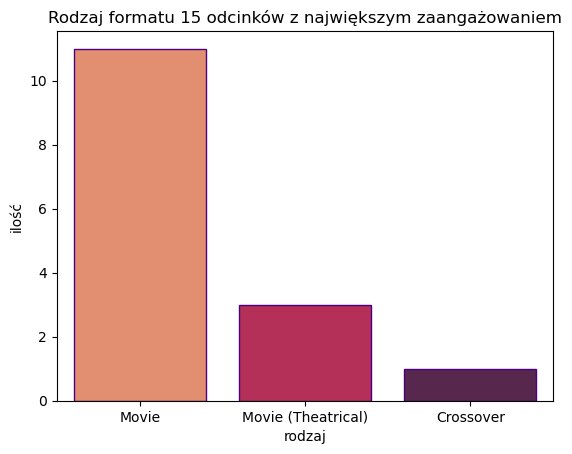

In [20]:
plt.figure()
sns.barplot(x = format_bar.index, y = format_bar, 
            palette ="rocket_r", ec="indigo")
plt.ylabel("ilość")
plt.xlabel("rodzaj")
plt.title("Rodzaj formatu 15 odcinków z największym zaangażowaniem")
plt.show()

### Ile odcinków zostało wydanych przez daną stację.

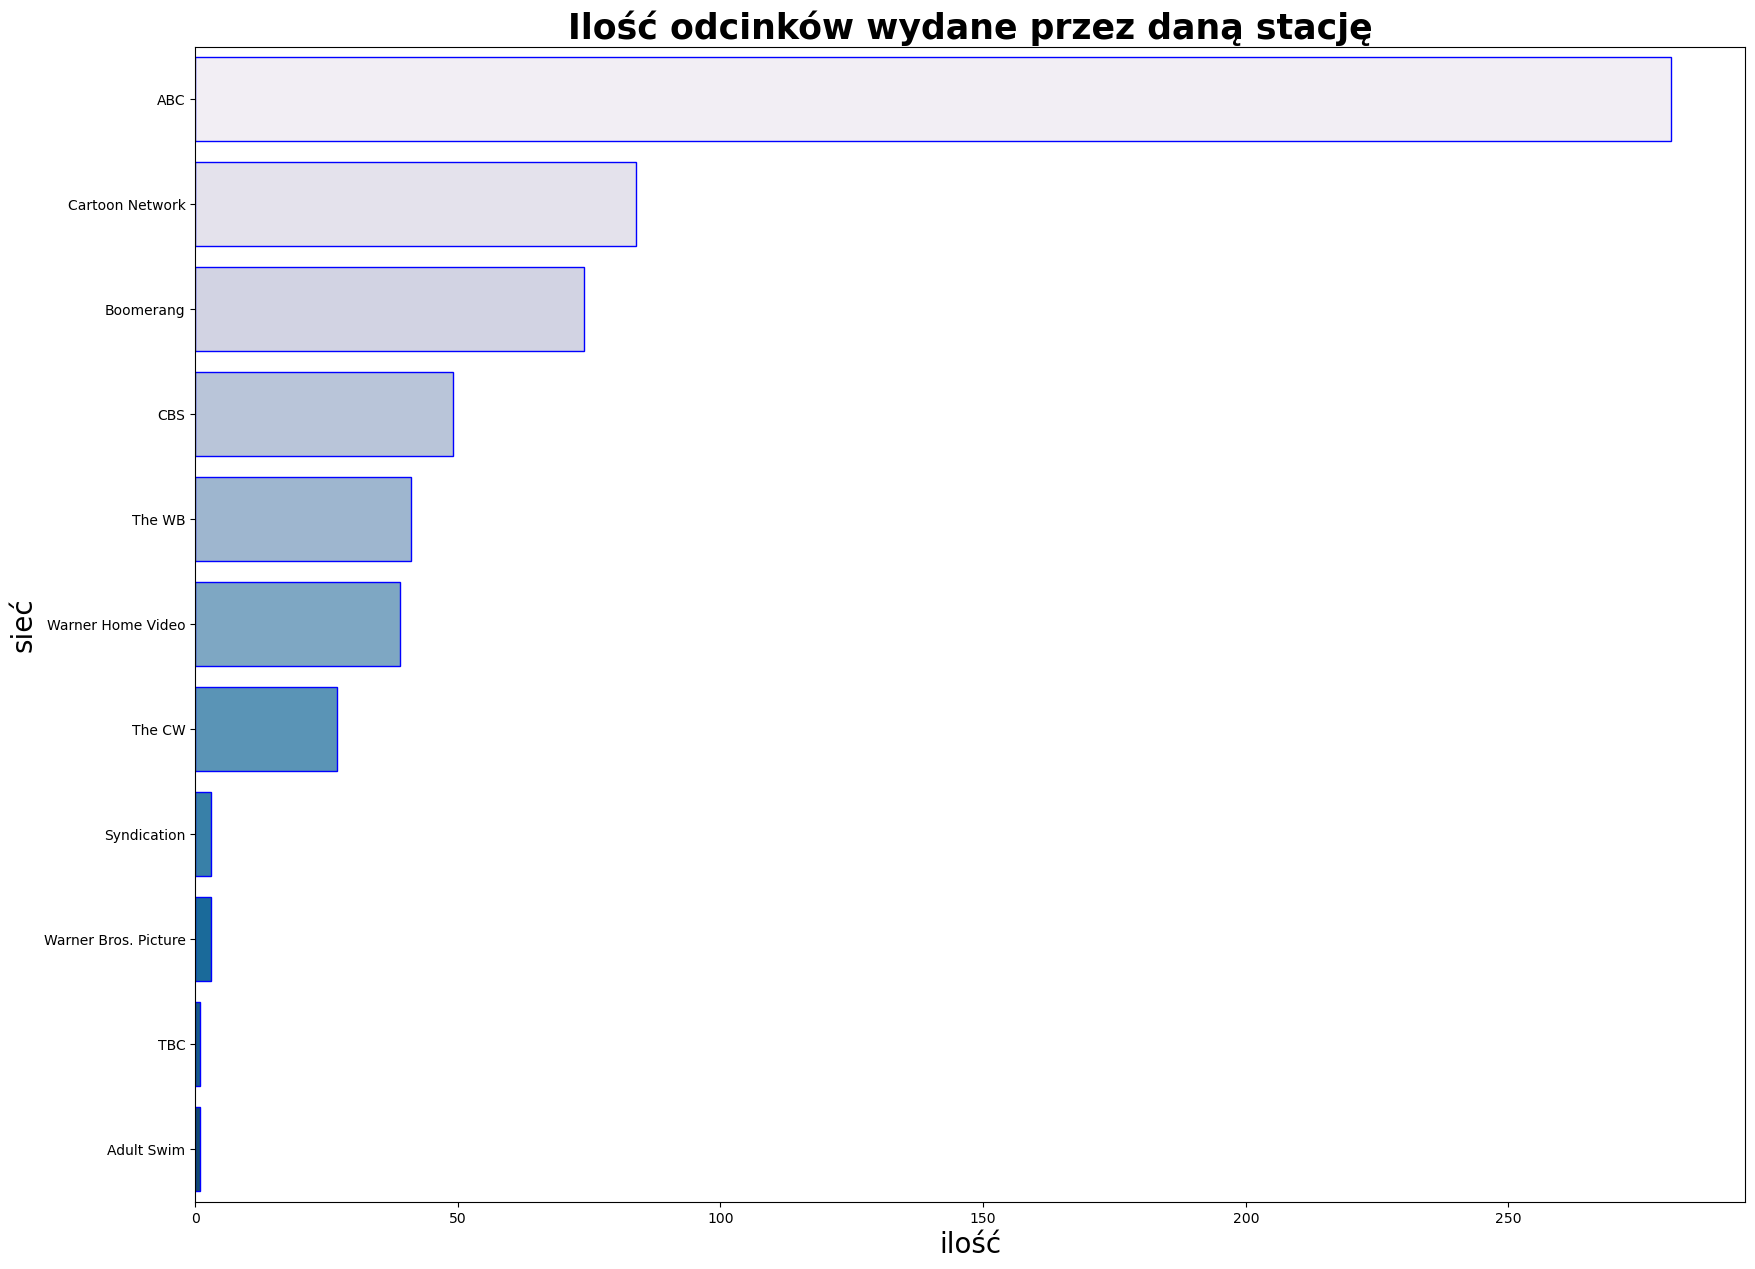

In [21]:
plt.figure(figsize=(20, 15))
plt.title("Ilość odcinków wydane przez daną stację", fontweight='bold', fontsize=25)
sns.countplot(data=scoobydoo_noNA, y='network',palette="PuBu",order = scoobydoo_noNA['network'].value_counts().index,ec = "blue",)
plt.xlabel('ilość',fontsize=20)
plt.ylabel('sieć',fontsize=20)
plt.show()

### Częstotliwość poszczególnych fraz na odcinek.

In [22]:
scoobydoo_noNA.columns.get_loc("jeepers")

56

In [23]:
scoobydoo_noNA.columns.get_loc("rooby_rooby_roo")

63

In [35]:
catch_phrases=scoobydoo_noNA.iloc[:,56:64]
catch_phrases['runtime']=scoobydoo_noNA['run_time']
catch_phrases_freq=df = catch_phrases.div(catch_phrases["runtime"], axis=0)

catch_phrases_freq.head()

,jeepers,jinkies,my_glasses,just_about_wrapped_up,zoinks,groovy,scooby_doo_where_are_you,rooby_rooby_roo,runtime
level_0,,,,,,,,,
0,0.0,0.0,0.047619,0.0,0.047619,0.000000,0.000000,0.047619,1.0
1,0.0,0.0,0.000000,0.0,0.136364,0.000000,0.045455,0.000000,1.0
2,0.0,0.0,0.000000,0.0,0.047619,0.095238,0.000000,0.000000,1.0
3,0.0,0.0,0.000000,0.0,0.095238,0.047619,0.000000,0.000000,1.0
4,0.0,0.0,0.047619,0.0,0.000000,0.000000,0.047619,0.000000,1.0


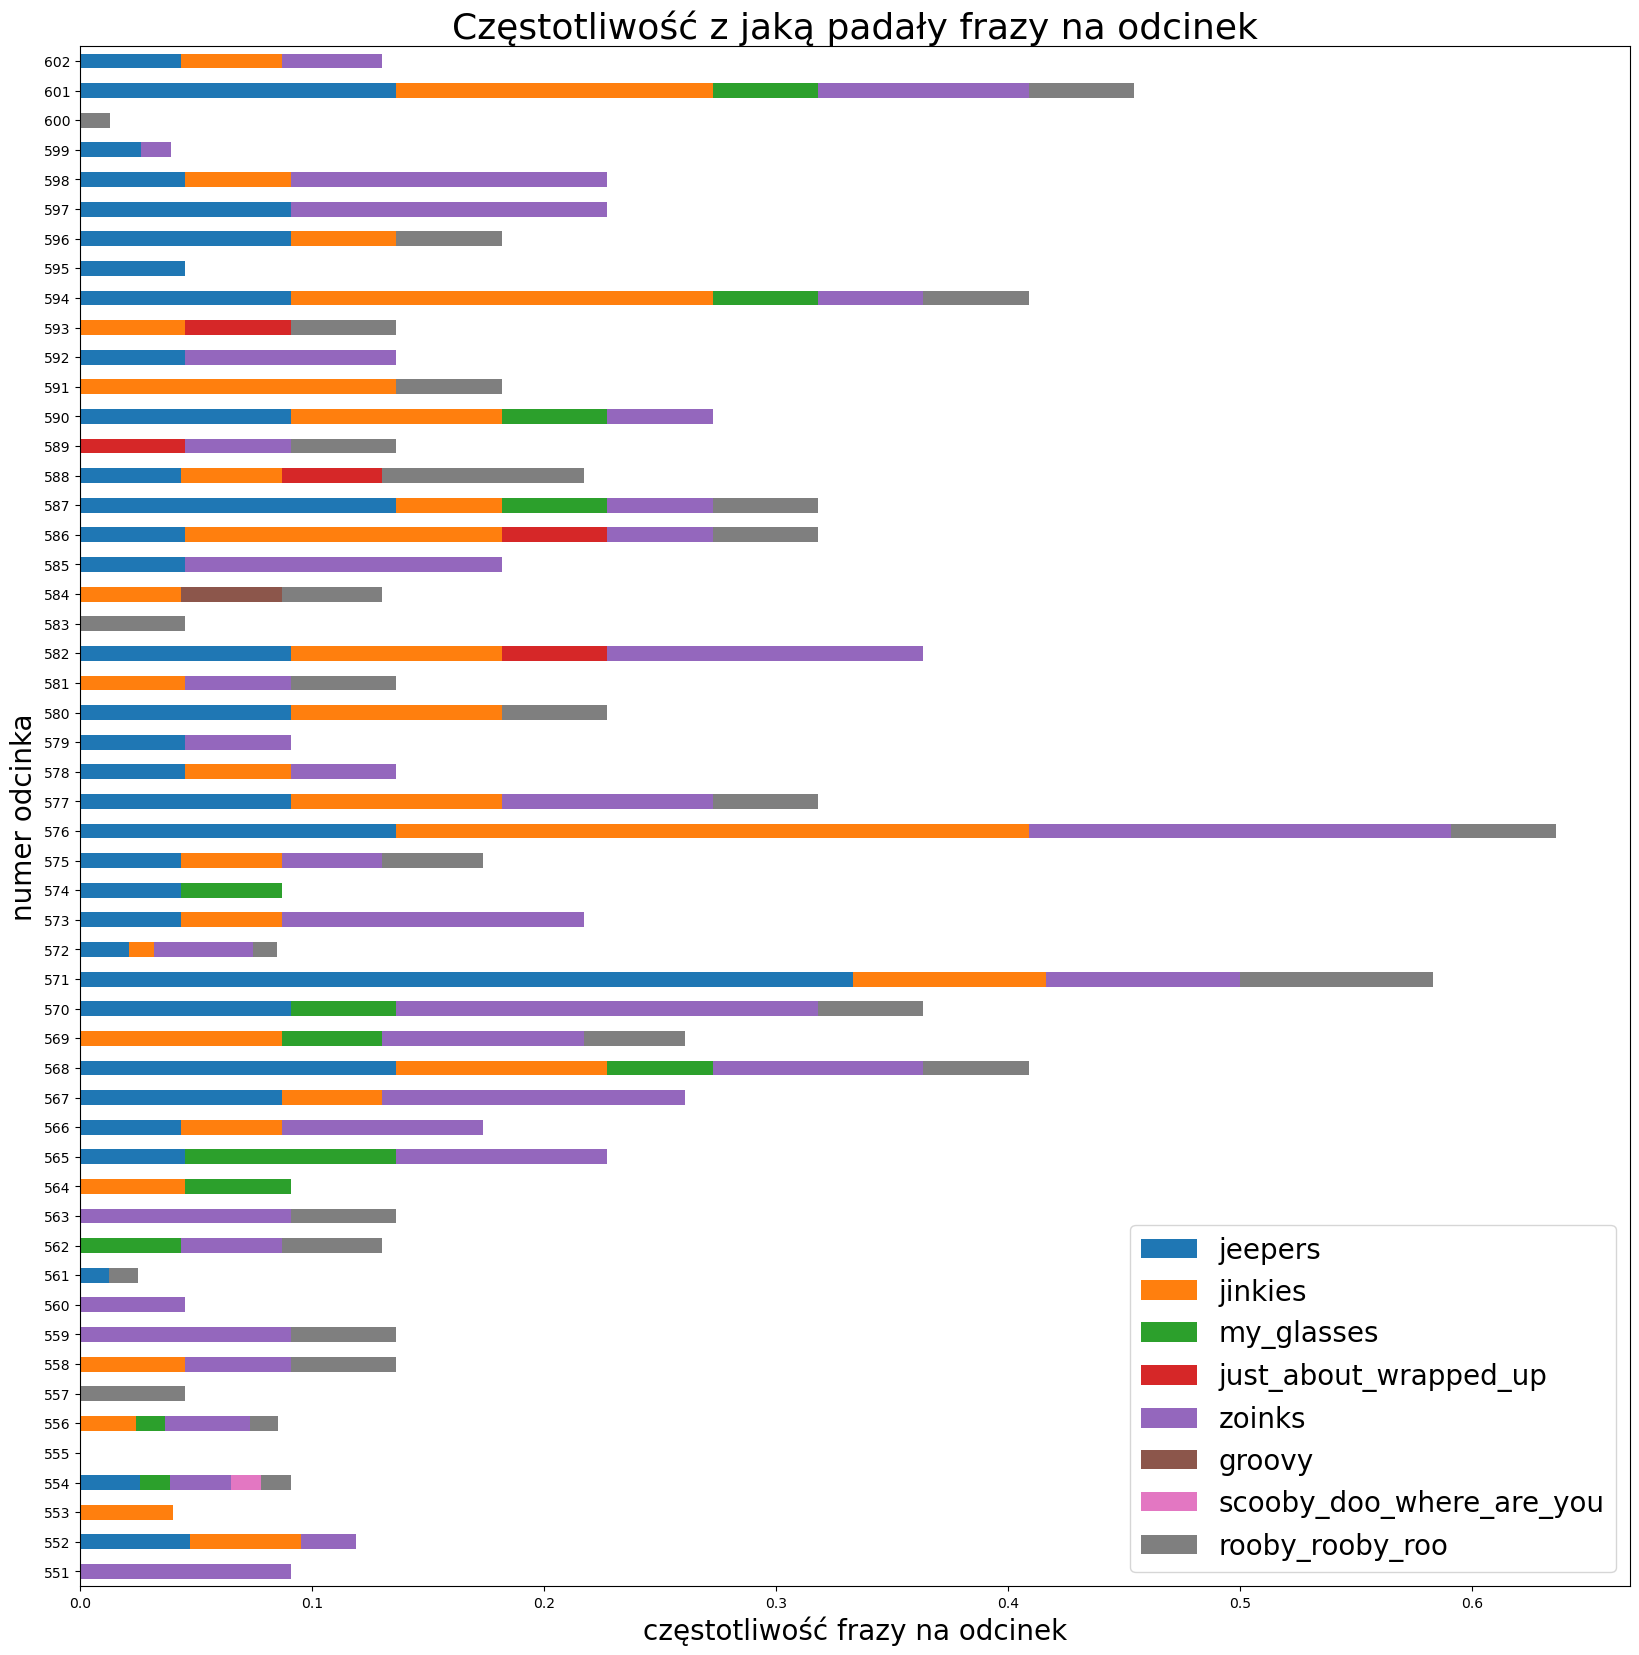

In [25]:
catch_phrases_freq.iloc[551:603,:-1].plot.barh( stacked=True, figsize=(20, 20), )
plt.ylabel("numer odcinka",fontsize=20)
plt.xlabel("częstotliwość frazy na odcinek",fontsize=20)
plt.title("Częstotliwość z jaką padały frazy na odcinek",fontsize=26)
plt.legend(fontsize=20)

### Przez kogo zostały złapane potwory?

In [26]:
fred_caught=scoobydoo_noNA['caught_fred'].value_counts()
daphnie_caught=scoobydoo_noNA['caught_daphnie'].value_counts()
velma_caught=scoobydoo_noNA['caught_velma'].value_counts()
shaggy_caught=scoobydoo_noNA['caught_shaggy'].value_counts()
scooby_caught=scoobydoo_noNA['caught_scooby'].value_counts()

In [27]:
scooby_caught

False    435
True     168
Name: caught_scooby, dtype: int64

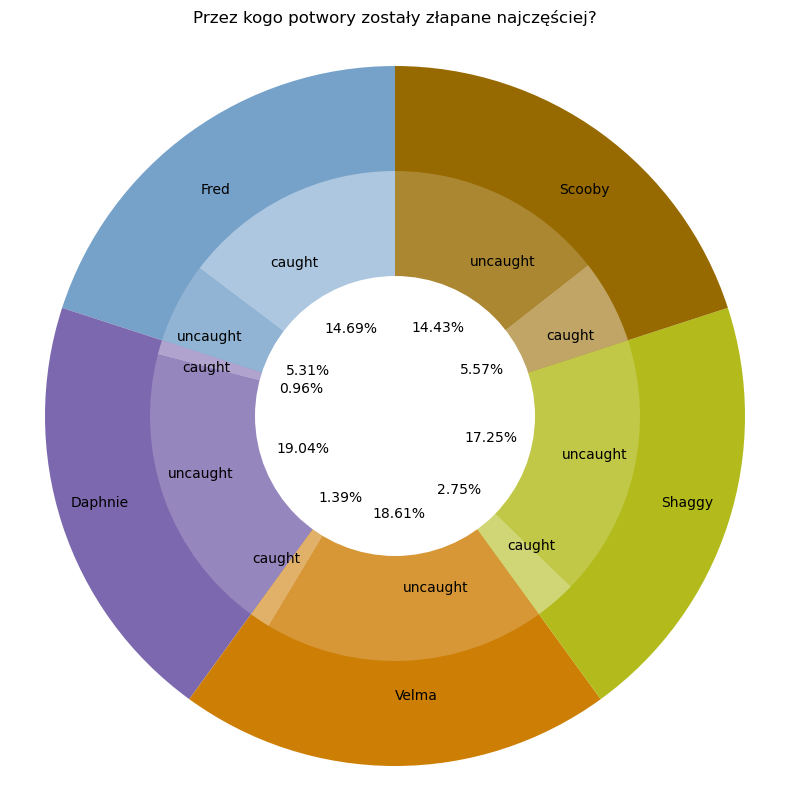

In [28]:
plt.figure(figsize=(8, 8)) 

labels = ['Fred','Daphnie','Velma','Shaggy','Scooby']
sizes = [fred_caught.sum(),daphnie_caught.sum(),velma_caught.sum(),shaggy_caught.sum(),scooby_caught.sum()]
colors = ['#76a2ca', '#7c68ae','#cd7e05','#b2bb1b','#966a00'] 

textprops = {'fontsize':14,'color':'black'}
labels_subgroup = ['caught', 'uncaught', 'caught', 'uncaught', 'caught', 'uncaught', 'caught', 'uncaught','caught', 'uncaught']
sizes_subgroup = [fred_caught[0], fred_caught[1], daphnie_caught[1],daphnie_caught[0], velma_caught[1], velma_caught[0],
                 shaggy_caught[1],shaggy_caught[0],scooby_caught[1],scooby_caught[0]]
colors_subgroup = ['#acc7df', '#91b4d4', '#b0a4ce', '#9686be',
 '#e1b169', '#d79736','#d0d676','#c1c848','#c0a566','#ab8732']
 
outside_donut = plt.pie(sizes, labels=labels, colors=colors, startangle=90, labeldistance=0.8)

inside_donut = plt.pie(sizes_subgroup, labels=labels_subgroup, colors=colors_subgroup, radius=0.7,
 startangle=90, labeldistance=0.7, autopct='%.2f%%', pctdistance =0.4)

centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.title('Przez kogo potwory zostały złapane najczęściej?')
plt.show()

### Korelacje.

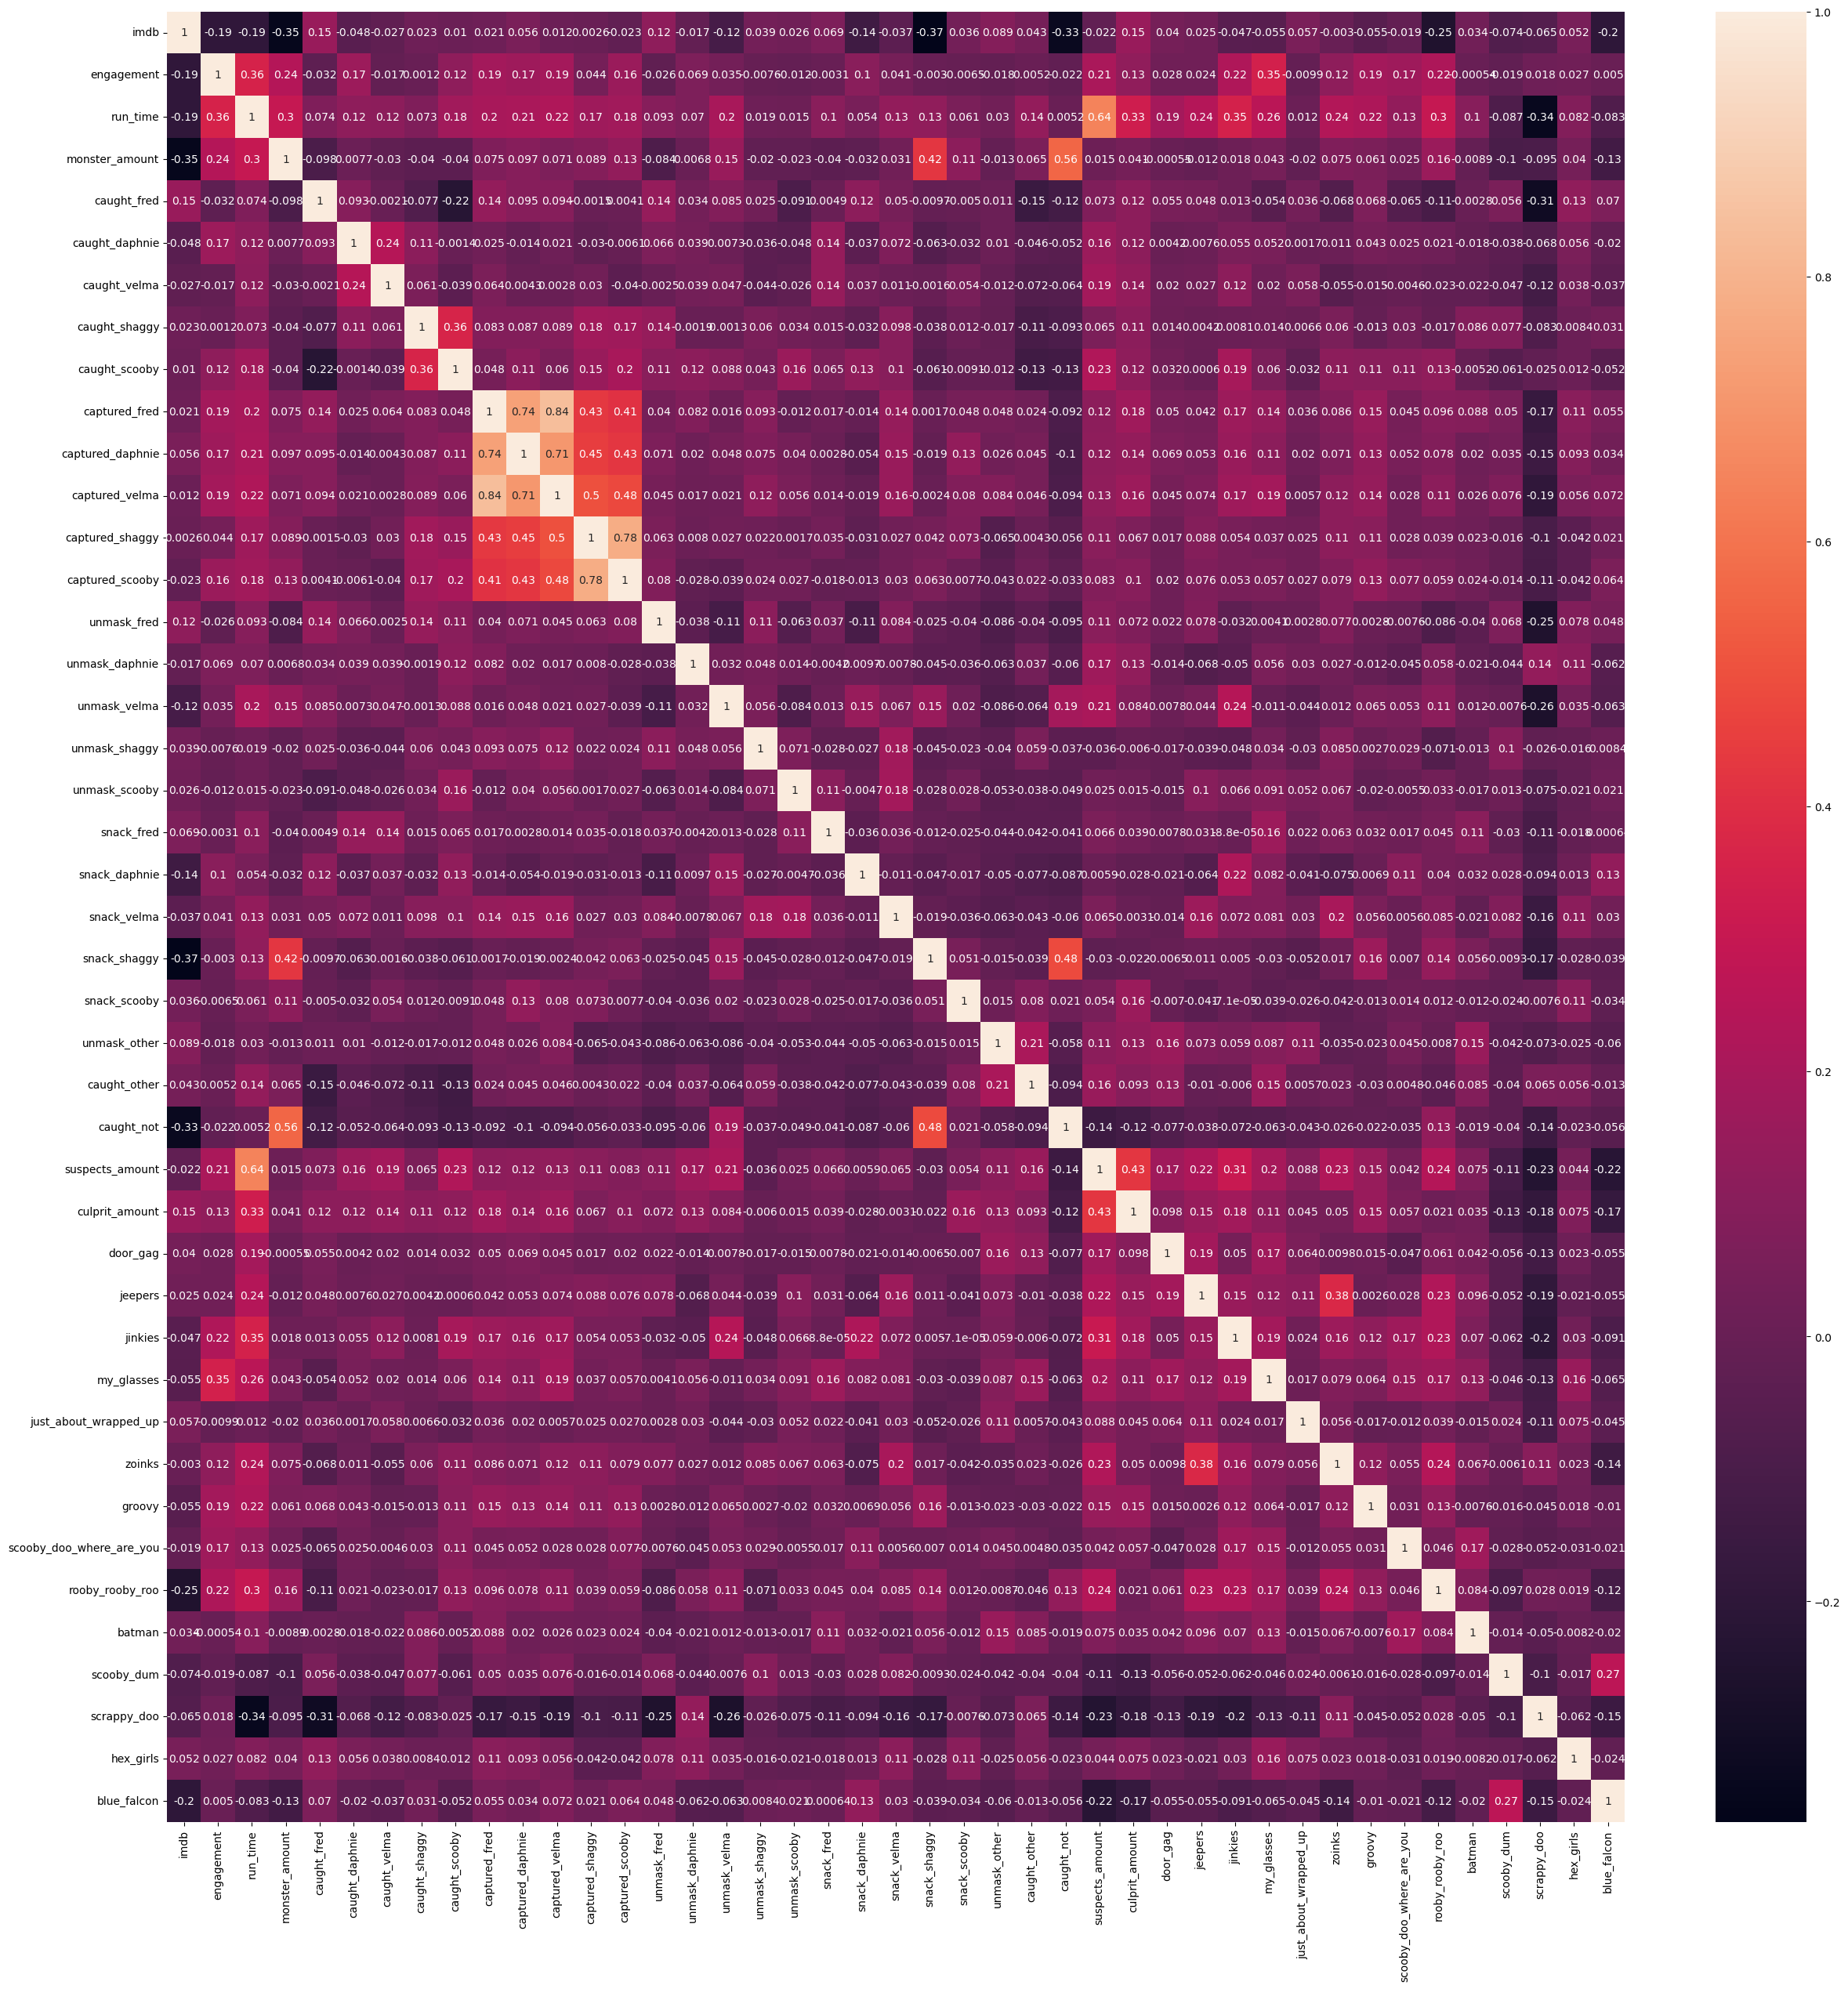

In [29]:
plt.figure(figsize=(30, 30))
sns.heatmap(scoobydoo_noNA.corr(),annot=True)
plt.show()

### Regresja liniowa.

Text(0.5, 1.0, 'Wyznaczenie linii regresji')

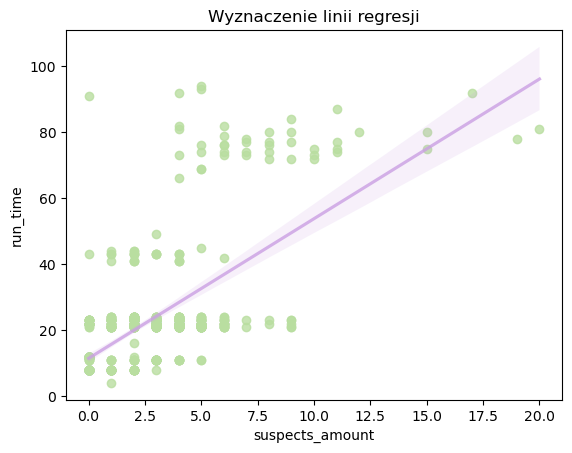

In [30]:
sns.regplot(x=scoobydoo_noNA['suspects_amount'], y=scoobydoo_noNA['run_time'], fit_reg=True,scatter_kws={"color": "#b9dea0cc"}, line_kws={"color": "#ca9fe3cc"})
plt.title("Wyznaczenie linii regresji")

In [31]:
x=scoobydoo_noNA['suspects_amount'].values.reshape(-1, 1)
y=scoobydoo_noNA['run_time'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

print(regressor.intercept_)
print(regressor.coef_)

[10.63151585]
[[4.61535189]]


Linia regresji wygląda następująco:\
**y=11.84+4.18*x**

In [36]:
y_pred = regressor.predict(X_test)
df_preds = pd.DataFrame({'wartość': y_test.squeeze(), 'przewidywana': y_pred.squeeze()})
df_preds.head(10)

,wartość,przewidywana
0,12.0,10.631516
1,21.0,33.708275
2,23.0,10.631516
3,21.0,29.092923
4,11.0,24.477572
5,22.0,38.323627
6,24.0,29.092923
7,22.0,29.092923
8,22.0,38.323627
9,11.0,24.477572


In [33]:
round(r2_score(y_test,y_pred),2)*100

32.0

Model nie jest dobrze dopasowany do danych, gdyż R^2 wynosi tylko 48%.